In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Final data exploration

This workbook is used to perform the final data exploration, including running the binomial t-test and Probit regressions, with the creation of the figures that are seen in the final dissertation project.

The first section performs the Binomial t-test
- data is obtained from: Binomial_test_&_merge_location.ipynb
- Binomial t-test statistics are calculated using the formula from Jaffe et al. (1993)
- Results are then manually inputted into a spreadsheet

The second section performs the Probit regresions
- data is obtained from: Binomial_test_&_merge_location.ipynb
- Probit regressions are performed on the raw data and subsets
- Results are manually inputted into a spreadsheet

The third section produces graphics used in the paper
- This uses data from the regression results
- Results are screenshotted and inputted into the report

The final section exports regional data to produce graphics in R


First we want to read in the data

In [2]:
#read in the all merged for regression data
#this comes from Binomial test.ipynb
#this contains all citations and their controls 
data = pd.read_csv("Patents data/all_merged_for_regression.csv")


Then we want to make sure that it is read in correctly and check how many cited patents and citations there are

In [3]:
#look at the data
#make sure that it is all read in correctly
data

,Actual_citation_first,Cited_App_nbr_first,Cited_prio_year,Citing_app_nbr_first,IPC,IPC_6_match,cited_count,country_match_first,distance_mean,distance_min,index,lag,local_match_first,region_match_first
0,0,WO1979000002,1977,16469777.0,G01N027/447,0,6,0,387.340150,371.737975,1,4,0,0
1,0,WO1979000002,1977,16964845.0,G01N027/447,0,6,0,3485.951923,3465.936403,2,14,0,0
2,0,WO1979000002,1977,WO1994004435,G01N027/447,0,6,0,683.798046,665.502613,3,15,0,0
3,0,WO1979000002,1977,17121856.0,G01N027/447,0,6,0,3452.210842,3432.205652,4,18,0,0
4,0,WO1979000002,1977,WO1998006439,G01N027/447,0,6,0,214.742977,206.652702,5,19,0,0
5,0,WO1980000019,1978,16440913.0,B65D077/04,0,6,0,5830.885897,5822.083867,6,0,0,0
6,0,WO1980000019,1978,16661533.0,B65D077/04,0,6,0,987.911218,987.911218,7,8,0,0
7,0,WO1980000019,1978,16772569.0,B65D077/04,0,6,0,497.761790,497.761790,8,10,0,0
8,0,WO1980000019,1978,16870139.0,B65D077/04,0,6,0,3355.966705,3355.966705,9,12,0,0
9,0,WO1990001392,1988,WO1992010153,B23K026/06,0,6,0,656.314367,649.743301,10,2,0,0


In [4]:
#we want to know how many unique cited patents there are
#this is found using the len of the unique list for Cited_App_nbr_first
print(len(list(data["Cited_App_nbr_first"].unique())))

#we also want to know how many citations there are
#given that this contains control as well we want half of the length of the overall dataframe
print(len(list(data["Cited_App_nbr_first"]))/2)

43793
145633.0


To run the binomial tests, data should be seperated into the EPO, PCT and combined datasets so that results can be compared

In [5]:
#binomial tests will be run on total, EPO and PCT datasets seperately therefore we want to seperate these out
#the first dataset we want is the complete
#but we want to test actual percentage against control
#so rows with 1 in actual citation are extracted
data_actual = data[data["Actual_citation_first"] ==1]
#and rows with 0 in actual citation are extracted
data_ctrl = data[data["Actual_citation_first"] ==0]

#the length of these can then be checked to make sure it is correct
print(len(data_actual))
print(len(data_ctrl))

#We then want data from the EPO and PCT
#Data from the EPO contains EP in the application number
data_EPO = data[data["Cited_App_nbr_first"].str.contains("EP")]
#Data from the PCT contains WO in the application number
data_PCT = data[data["Cited_App_nbr_first"].str.contains("WO")]

#Extracting the actual cittaions and control patents are performed the same as above
EPO_actual = data_EPO[data_EPO["Actual_citation_first"] == 1]
EPO_ctrl = data_EPO[data_EPO["Actual_citation_first"] == 0]
PCT_actual = data_PCT[data_PCT["Actual_citation_first"] == 1] 
PCT_ctrl = data_PCT[data_PCT["Actual_citation_first"] == 0]

#the length of these can then be used to check to make sure the correct number are extracted
print(len(EPO_actual) + len(EPO_ctrl) + len(PCT_actual) + len(PCT_ctrl))


145633
145633
291266


Matches based on local, regional, and country level are already computed in the existing dataset. Thus, means can be calculated from each of the columns to calculate the percentage that is matched

In [6]:
#matchings based on local, regional and country level are already computed 
#thus from the control and actual datasets we want to extract the means for the macth column
#this is done for each of the datasets
actual_loc = data_actual["local_match_first"].mean()
ctrl_loc = data_ctrl["local_match_first"].mean()
actual_reg = data_actual["region_match_first"].mean()
ctrl_reg = data_ctrl["region_match_first"].mean()
actual_ctry = data_actual["country_match_first"].mean()
ctrl_ctry = data_ctrl["country_match_first"].mean()
data_count = len(data_actual)

EPO_actual_loc = EPO_actual["local_match_first"].mean()
EPO_ctrl_loc = EPO_ctrl["local_match_first"].mean()
EPO_actual_reg = EPO_actual["region_match_first"].mean()
EPO_ctrl_reg = EPO_ctrl["region_match_first"].mean()
EPO_actual_ctry = EPO_actual["country_match_first"].mean()
EPO_ctrl_ctry = EPO_ctrl["country_match_first"].mean()
EPO_data_count = len(EPO_actual)

PCT_actual_loc = PCT_actual["local_match_first"].mean()
PCT_ctrl_loc = PCT_ctrl["local_match_first"].mean()
PCT_actual_reg = PCT_actual["region_match_first"].mean()
PCT_ctrl_reg = PCT_ctrl["region_match_first"].mean()
PCT_actual_ctry = PCT_actual["country_match_first"].mean()
PCT_ctrl_ctry = PCT_ctrl["country_match_first"].mean()
PCT_data_count = len(PCT_actual)

The t-statistic is then calculated using the formula: (A-B)/((A*(1-A)+B(1-B))/count)^0.5) 
Here A represents the percentage for actual citations, B represents the percentage for the control citations.

This is done for all administrative boundaries within each database.

In [7]:
#the results of this are stored in  a t-variable
actual_reg_t = (actual_reg-ctrl_reg)/(((actual_reg*(1-actual_reg))+(ctrl_reg*(1-ctrl_reg)))/data_count)**0.5
actual_country_t = (actual_ctry - ctrl_ctry)/((actual_ctry*(1-actual_ctry)+ctrl_ctry*(1-ctrl_ctry))/data_count)**0.5
actual_local_t = (actual_loc - ctrl_loc)/((actual_loc*(1-actual_loc)+ctrl_loc*(1-ctrl_loc))/data_count)**0.5

EPO_reg_t = (EPO_actual_reg-EPO_ctrl_reg)/(((EPO_actual_reg*(1-EPO_actual_reg))+(EPO_ctrl_reg*(1-EPO_ctrl_reg)))/EPO_data_count)**0.5
EPO_country_t = (EPO_actual_ctry - EPO_ctrl_ctry)/((EPO_actual_ctry*(1-EPO_actual_ctry)+EPO_ctrl_ctry*(1-EPO_ctrl_ctry))/EPO_data_count)**0.5
EPO_local_t = (EPO_actual_loc - EPO_ctrl_loc)/((EPO_actual_loc*(1-EPO_actual_loc)+EPO_ctrl_loc*(1-EPO_ctrl_loc))/EPO_data_count)**0.5

PCT_reg_t = (PCT_actual_reg-PCT_ctrl_reg)/(((PCT_actual_reg*(1-PCT_actual_reg))+(PCT_ctrl_reg*(1-PCT_ctrl_reg)))/PCT_data_count)**0.5
PCT_country_t = (PCT_actual_ctry - PCT_ctrl_ctry)/((PCT_actual_ctry*(1-PCT_actual_ctry)+PCT_ctrl_ctry*(1-PCT_ctrl_ctry))/PCT_data_count)**0.5
PCT_local_t = (PCT_actual_loc - PCT_ctrl_loc)/((PCT_actual_loc*(1-PCT_actual_loc)+PCT_ctrl_loc*(1-PCT_ctrl_loc))/PCT_data_count)**0.5

The results are then printed and copied into a spreadsheet for:

### Total

In [8]:
print(data_count*2)
print(actual_loc)
print(ctrl_loc)
print(actual_local_t)

print(actual_reg)
print(ctrl_reg)
print(actual_reg_t)

print(actual_ctry)
print(ctrl_ctry)
print(actual_country_t)

291266
0.028427622860203387
0.003721683958992811
53.26839319450077
0.04536746479163376
0.011954708067539637
54.31045759104257
0.0999498739983383
0.05634025255264947
43.989908765206906


### EPO

In [9]:
print(EPO_data_count*2)
print(EPO_actual_loc)
print(EPO_ctrl_loc)
print(EPO_local_t)

print(EPO_actual_reg)
print(EPO_ctrl_reg)
print(EPO_reg_t)

print(EPO_actual_ctry)
print(EPO_ctrl_ctry)
print(EPO_country_t)

136852
0.05872036945020898
0.006298775319323064
55.28056113661052
0.08508461695846609
0.016119603659427703
58.93293201767486
0.15559874901353288
0.06566217519656271
53.58740842189509


### PCT

In [10]:
print(PCT_data_count*2)
print(PCT_actual_loc)
print(PCT_ctrl_loc)
print(PCT_local_t)

print(PCT_actual_reg)
print(PCT_ctrl_reg)
print(PCT_reg_t)

print(PCT_actual_ctry)
print(PCT_ctrl_ctry)
print(PCT_country_t)

154414
0.0015801676013832942
0.0014376934733897186
0.721179484195627
0.01016747186135972
0.00826349942362739
3.915135833393608
0.050630124211535225
0.04807854210110482
2.31450669844451


# Regressions

Within this section regressions are performed on the data based on the distance column and local, regional and country level matching.

Regressions are based on the Probit regression model due to the dichotomous outcome variable of whether there is a citation or not to the originating patent.

These regressions include:
- Overall regression
- Regressions by origin year
- Regressions by lag
- Regressions by industry

In all regressions, a match at the IPC 6 level is included to further control for the existing distribution of industry

### Overall regressions

The first regression is the specification of the baseline model.

This includes:
- ln(distance+1)
- Distance boundaries
- Administrative boundaries
- Full specification
- Most cited patents
- Least cited patents

In [11]:
#Given that we are interested in distance, a column is created with ln(distance +1) to consider the effects of distance alone
data["ln(distance+1)"] = np.log(data["distance_mean"].astype(float) + 1)

The first regression is pure distance as measured in logs

In [12]:
#for these regressions, statsmodel API is used
import statsmodels.api as sm
#From this, Probit regression is imported
from statsmodels.discrete.discrete_model import Probit
#Logit regression is also important so that the results can be compared
from statsmodels.discrete.discrete_model import Logit

#the X value here is the ln(distance + 1) and IPC_6_match
X = data[["ln(distance+1)",
         "IPC_6_match"]]
#The outcome variable that we are interested in is whether there is an actual citation
Y = data["Actual_citation_first"]
#A constant is added as the intercept
X = sm.add_constant(X)

#Probit model is used here but other specifications are also included, with results being outputted to a spreadsheet
#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#print(model.summary())

#given that a Probit regression is ran the normal coefficients cannot be easily interpreted
#Therefore the margins are used. This is interpreted as a 1 unit change in X is associated with a percentage point change in 
#the probability that Y will be either 1 or 0
print(model.get_margeff().summary())

C:\Users\cex\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.685306
         Iterations 4
        Probit Marginal Effects         
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ln(distance+1)    -0.0211      0.001    -33.193      0.000      -0.022      -0.020
IPC_6_match        0.1293      0.002     54.364      0.000       0.125       0.134


The second regression is done using administrative boundaries

In [13]:
#This is then repeated for the local match

X = data[["local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.681791
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
local_match_first       0.2668      0.013     21.220      0.000       0.242       0.291
region_match_first      0.1218      0.009     13.226      0.000       0.104       0.140
country_match_first     0.0541      0.004     12.933      0.000       0.046       0.062
IPC_6_match             0.1246      0.002     52.612      0.000       0.120       0.129
=======================================================================================
"""

For the third regression some data cleaning needs to take place.

Boundaries are established on the basis of the decay of the effects of distance expected.

In [14]:
#We want to be able to break up the distances into different boundaries
#The first thing to do is therefore create columns for the different distances
#These columns will originally be set at 0
data["miles0-25"] = 0
data["miles25-50"] = 0
data["miles50-100"] = 0
data["miles100-250"] = 0
data["miles250-500"] = 0
data["miles500-1000"] = 0
data["miles1000-2500"] = 0
data["miles2500-5000"] = 0
data["miles>5000"] = 0

In [15]:
#Distance mean is used to calculate distance
#If distance is within one of the boundaries then a 1 is assigned, else the value remains 0
#Several conditions are therefore used

data.loc[data["distance_mean"] <=25, "miles0-25"] = 1
data.loc[(data["distance_mean"] >25)&(data["distance_mean"] <=50), "miles25-50"] = 1
data.loc[(data["distance_mean"] >50)&(data["distance_mean"] <=100), "miles50-100"] = 1
data.loc[(data["distance_mean"] >100)&(data["distance_mean"] <=250), "miles100-250"] = 1
data.loc[(data["distance_mean"] >250)&(data["distance_mean"] <=500), "miles250-500"] = 1
data.loc[(data["distance_mean"] >500)&(data["distance_mean"] <=1000), "miles500-1000"] = 1
data.loc[(data["distance_mean"] >1000)&(data["distance_mean"] <=2500), "miles1000-2500"] = 1
data.loc[(data["distance_mean"] >2500)&(data["distance_mean"] <=5000), "miles2500-5000"] = 1
data.loc[data["distance_mean"] > 5000, "miles>5000"] = 1


The third regression is performed on the basis that distance alone affects knowledge spillovers, but measured through given boundaries.

In [16]:

X = data[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
         "IPC_6_match"]]
Y = data["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.682861
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
==================================================================================
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
miles25-50        -0.2567      0.014    -18.278      0.000      -0.284      -0.229
miles50-100       -0.3268      0.012    -26.550      0.000      -0.351      -0.303
miles100-250      -0.3586      0.011    -33.682      0.000      -0.380      -0.338
miles250-500      -0.4072      0.010    -40.535      0.000      -0.427      -0.387
miles500-1000     -0.4106      0.010    -41.176      0.000      -0.430      -0.391
miles1000-2500    -0.3825      0.011    -35.771      0.000      -0.403      -0.362
miles2500-5000    -0.4094      0.010    -41.326      0.000      -0.429      -0.390
miles>5000        -0.4151      0.010    -41.957      0.000      -0.434      -0.396
IPC_6_match        0.1263      0.002     53.147      0.000       0.122       0.131
==================================================================================
"""

The fourth regression includes the full specification model

In [17]:
X = data[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.681621
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0882      0.016     -5.409      0.000      -0.120      -0.056
miles50-100            -0.1081      0.016     -6.966      0.000      -0.139      -0.078
miles100-250           -0.0935      0.015     -6.298      0.000      -0.123      -0.064
miles250-500           -0.1165      0.015     -7.740      0.000      -0.146      -0.087
miles500-1000          -0.1180      0.015     -7.824      0.000      -0.148      -0.088
miles1000-2500         -0.0980      0.015     -6.392      0.000      -0.128      -0.068
miles2500-5000         -0.1172      0.015     -7.806      0.000      -0.147      -0.088
miles>5000             -0.1220      0.015     -8.116      0.000      -0.152      -0.093
local_match_first       0.2167      0.014     15.004      0.000       0.188       0.245
region_match_first      0.1061      0.010     10.600      0.000       0.086       0.126
country_match_first     0.0363      0.006      6.192      0.000       0.025       0.048
IPC_6_match             0.1238      0.002     52.051      0.000       0.119       0.128
=======================================================================================
"""

We can then use this baseline specification to compare the results when the most cited patents are used, against the least cited patents. These boundaries are found using the top 25% cited patents and the bottom 25% patents.

In [18]:
#these boundaries are found using data.describe()
#This gives quartile, mean, std and count values for all the data
#What we are interested in is mostly cited_count column
data.describe()

,Actual_citation_first,Cited_prio_year,IPC_6_match,cited_count,country_match_first,distance_mean,distance_min,index,lag,local_match_first,...,ln(distance+1),miles0-25,miles25-50,miles50-100,miles100-250,miles250-500,miles500-1000,miles1000-2500,miles2500-5000,miles>5000
count,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,...,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000
mean,0.500000,1994.784637,0.184656,26.435190,0.078145,3008.545526,2902.767465,37003.096963,8.259673,0.016075,...,7.361851,0.014076,0.008806,0.015213,0.046226,0.137318,0.181298,0.043675,0.262248,0.291139
std,0.500001,8.870119,0.388019,76.440854,0.268400,2414.224049,2433.787234,21518.421485,6.779746,0.125763,...,1.479334,0.117807,0.093428,0.122399,0.209974,0.344183,0.385266,0.204371,0.439858,0.454288
min,0.000000,1977.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-21.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1988.000000,0.000000,2.000000,0.000000,539.574536,490.174701,18442.000000,3.000000,0.000000,...,6.292633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1995.000000,0.000000,5.000000,0.000000,3393.668338,3296.029979,36856.000000,6.000000,0.000000,...,8.129961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2001.000000,0.000000,14.000000,0.000000,5335.544178,5311.508396,55274.000000,12.000000,0.000000,...,8.582334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,2017.000000,1.000000,630.000000,1.000000,11836.301058,11832.322640,78257.000000,40.000000,1.000000,...,9.379011,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#based on the results from the data describe, the bottom quartiles is patents who have cited_count <2
data_bot_cit = data.loc[data["cited_count"] <= 2, :]
#while the top quartiles have cited_Count >=14
data_top_cit = data.loc[data["cited_count"] >= 14, :]

Regressions are then performed on the top 25%.

In [20]:
X = data_top_cit[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data_top_cit["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.689879
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0320      0.044     -0.719      0.472      -0.119       0.055
miles50-100            -0.0132      0.042     -0.315      0.752      -0.096       0.069
miles100-250           -0.0153      0.040     -0.378      0.706      -0.094       0.064
miles250-500            0.0026      0.040      0.063      0.949      -0.077       0.082
miles500-1000          -0.0058      0.041     -0.143      0.886      -0.085       0.074
miles1000-2500          0.0671      0.041      1.647      0.100      -0.013       0.147
miles2500-5000          0.0351      0.040      0.870      0.384      -0.044       0.114
miles>5000              0.0169      0.040      0.418      0.676      -0.062       0.096
local_match_first       0.1841      0.038      4.803      0.000       0.109       0.259
region_match_first      0.1188      0.022      5.287      0.000       0.075       0.163
country_match_first     0.0463      0.012      3.801      0.000       0.022       0.070
IPC_6_match             0.0752      0.008      9.668      0.000       0.060       0.090
=======================================================================================
"""

And the bottom 25%

In [21]:
X = data_bot_cit[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data_bot_cit["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.671472
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.1143      0.028     -4.061      0.000      -0.169      -0.059
miles50-100            -0.1112      0.027     -4.103      0.000      -0.164      -0.058
miles100-250           -0.1020      0.026     -3.965      0.000      -0.152      -0.052
miles250-500           -0.1435      0.026     -5.470      0.000      -0.195      -0.092
miles500-1000          -0.1325      0.026     -5.046      0.000      -0.184      -0.081
miles1000-2500         -0.1692      0.027     -6.283      0.000      -0.222      -0.116
miles2500-5000         -0.1724      0.026     -6.581      0.000      -0.224      -0.121
miles>5000             -0.1739      0.026     -6.632      0.000      -0.225      -0.122
local_match_first       0.2265      0.026      8.869      0.000       0.176       0.277
region_match_first      0.1241      0.019      6.674      0.000       0.088       0.161
country_match_first     0.0286      0.011      2.504      0.012       0.006       0.051
IPC_6_match             0.1495      0.004     37.455      0.000       0.142       0.157
=======================================================================================
"""

These results were then outputted and interpreted in the first part of the results section given in the final report.

The main finding is that knowledge spillovers are affected by both administrative boundaries and distance, the majority of knowledge spillovers decay within 100 miles and that highly cited patents are less affected by distance than low value patents.

# Regressions over time

The next section then explores the question as to how knowledge spillovers have behaved over time. 

This includes regressions based on citations originating:
- prior to 1993
- After 1993
- Within 1977-1984
- Within 1984-1991
- Within 1991-1998
- Within 1998-2005
- Within 2005-2012

The reason for the truncation is, as shown in the `data.describe()` above, half the citations occur within a lag of 6 years. Therefore, allowing for patents to orinate no later than 2012 in the split years allows for those in the final years of 2012 to receive at least 50% of their citations.

The first thing to do therefore is to split the data into different years.

In [22]:
#[1977,1984,1991,1998,2005,2012]
#This is done using conditionals, such that if the year of the originating patent is within certain bounds then it
#is assigned to the given dataset
data84 = data.loc[data["Cited_prio_year"] <= 1984, :]
data91 = data.loc[(data["Cited_prio_year"] > 1984) & (data["Cited_prio_year"] <=1991), :]
data98 = data.loc[(data["Cited_prio_year"] > 1991) & (data["Cited_prio_year"] <=1998), :]
data05 = data.loc[(data["Cited_prio_year"] > 1998) & (data["Cited_prio_year"] <=2005), :]
data12 = data.loc[(data["Cited_prio_year"] > 2005) & (data["Cited_prio_year"] <=2012), :]
dataearly = data.loc[data["Cited_prio_year"] < 1993, :]
datalate = data.loc[data["Cited_prio_year"] >= 1993, :]

Regressions can then be performed on the individual datasets

In [23]:
X = dataearly[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = dataearly["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.675197
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0609      0.022     -2.815      0.005      -0.103      -0.019
miles50-100            -0.0595      0.021     -2.884      0.004      -0.100      -0.019
miles100-250           -0.0622      0.020     -3.155      0.002      -0.101      -0.024
miles250-500           -0.0882      0.020     -4.369      0.000      -0.128      -0.049
miles500-1000          -0.0976      0.020     -4.819      0.000      -0.137      -0.058
miles1000-2500         -0.0824      0.021     -3.956      0.000      -0.123      -0.042
miles2500-5000         -0.1051      0.020     -5.208      0.000      -0.145      -0.066
miles>5000             -0.1082      0.020     -5.350      0.000      -0.148      -0.069
local_match_first       0.2105      0.019     10.948      0.000       0.173       0.248
region_match_first      0.0928      0.014      6.577      0.000       0.065       0.120
country_match_first     0.0484      0.008      5.760      0.000       0.032       0.065
IPC_6_match             0.1472      0.003     48.621      0.000       0.141       0.153
=======================================================================================
"""

In [24]:
X = datalate[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = datalate["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.685158
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.1203      0.025     -4.880      0.000      -0.169      -0.072
miles50-100            -0.1659      0.023     -7.063      0.000      -0.212      -0.120
miles100-250           -0.1311      0.022     -5.833      0.000      -0.175      -0.087
miles250-500           -0.1488      0.023     -6.595      0.000      -0.193      -0.105
miles500-1000          -0.1450      0.023     -6.422      0.000      -0.189      -0.101
miles1000-2500         -0.1254      0.023     -5.491      0.000      -0.170      -0.081
miles2500-5000         -0.1398      0.023     -6.214      0.000      -0.184      -0.096
miles>5000             -0.1496      0.023     -6.645      0.000      -0.194      -0.106
local_match_first       0.2247      0.022     10.302      0.000       0.182       0.267
region_match_first      0.1178      0.014      8.312      0.000       0.090       0.146
country_match_first     0.0246      0.008      3.021      0.003       0.009       0.041
IPC_6_match             0.1057      0.004     26.336      0.000       0.098       0.114
=======================================================================================
"""

In [25]:
X = data84[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data84["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.669498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.1145      0.034     -3.417      0.001      -0.180      -0.049
miles50-100            -0.0942      0.032     -2.950      0.003      -0.157      -0.032
miles100-250           -0.1003      0.031     -3.249      0.001      -0.161      -0.040
miles250-500           -0.1302      0.032     -4.071      0.000      -0.193      -0.068
miles500-1000          -0.1456      0.032     -4.533      0.000      -0.209      -0.083
miles1000-2500         -0.1514      0.034     -4.499      0.000      -0.217      -0.085
miles2500-5000         -0.1616      0.032     -5.047      0.000      -0.224      -0.099
miles>5000             -0.1509      0.032     -4.702      0.000      -0.214      -0.088
local_match_first       0.1388      0.030      4.614      0.000       0.080       0.198
region_match_first      0.0951      0.022      4.236      0.000       0.051       0.139
country_match_first     0.0525      0.014      3.749      0.000       0.025       0.080
IPC_6_match             0.1713      0.005     35.529      0.000       0.162       0.181
=======================================================================================
"""

In [26]:
X = data91[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data91["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.676842
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0226      0.030     -0.760      0.447      -0.081       0.036
miles50-100            -0.0501      0.028     -1.758      0.079      -0.106       0.006
miles100-250           -0.0400      0.027     -1.477      0.140      -0.093       0.013
miles250-500           -0.0664      0.028     -2.412      0.016      -0.120      -0.012
miles500-1000          -0.0735      0.028     -2.660      0.008      -0.128      -0.019
miles1000-2500         -0.0513      0.028     -1.818      0.069      -0.107       0.004
miles2500-5000         -0.0798      0.027     -2.904      0.004      -0.134      -0.026
miles>5000             -0.0899      0.028     -3.263      0.001      -0.144      -0.036
local_match_first       0.2400      0.026      9.114      0.000       0.188       0.292
region_match_first      0.1028      0.019      5.319      0.000       0.065       0.141
country_match_first     0.0384      0.011      3.439      0.001       0.017       0.060
IPC_6_match             0.1381      0.004     33.756      0.000       0.130       0.146
=======================================================================================
"""

In [27]:
X = data98[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data98["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.684350
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.1168      0.036     -3.259      0.001      -0.187      -0.047
miles50-100            -0.1259      0.035     -3.649      0.000      -0.194      -0.058
miles100-250           -0.1040      0.033     -3.128      0.002      -0.169      -0.039
miles250-500           -0.1240      0.034     -3.695      0.000      -0.190      -0.058
miles500-1000          -0.1289      0.034     -3.836      0.000      -0.195      -0.063
miles1000-2500         -0.1120      0.034     -3.294      0.001      -0.179      -0.045
miles2500-5000         -0.1183      0.033     -3.533      0.000      -0.184      -0.053
miles>5000             -0.1329      0.034     -3.965      0.000      -0.199      -0.067
local_match_first       0.2518      0.032      7.786      0.000       0.188       0.315
region_match_first      0.1066      0.020      5.278      0.000       0.067       0.146
country_match_first     0.0438      0.012      3.729      0.000       0.021       0.067
IPC_6_match             0.1060      0.006     19.220      0.000       0.095       0.117
=======================================================================================
"""

In [28]:
X = data05[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data05["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.685676
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0970      0.041     -2.378      0.017      -0.177      -0.017
miles50-100            -0.1542      0.039     -3.984      0.000      -0.230      -0.078
miles100-250           -0.1407      0.037     -3.802      0.000      -0.213      -0.068
miles250-500           -0.1572      0.037     -4.245      0.000      -0.230      -0.085
miles500-1000          -0.1544      0.037     -4.168      0.000      -0.227      -0.082
miles1000-2500         -0.1165      0.037     -3.116      0.002      -0.190      -0.043
miles2500-5000         -0.1532      0.037     -4.151      0.000      -0.226      -0.081
miles>5000             -0.1605      0.037     -4.346      0.000      -0.233      -0.088
local_match_first       0.1876      0.036      5.243      0.000       0.117       0.258
region_match_first      0.1181      0.023      5.046      0.000       0.072       0.164
country_match_first     0.0096      0.013      0.730      0.465      -0.016       0.036
IPC_6_match             0.1092      0.007     16.358      0.000       0.096       0.122
=======================================================================================
"""

In [29]:
X = data12[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data12["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.684601
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.1556      0.055     -2.829      0.005      -0.263      -0.048
miles50-100            -0.2071      0.050     -4.114      0.000      -0.306      -0.108
miles100-250           -0.1376      0.048     -2.894      0.004      -0.231      -0.044
miles250-500           -0.1630      0.048     -3.409      0.001      -0.257      -0.069
miles500-1000          -0.1442      0.048     -3.014      0.003      -0.238      -0.050
miles1000-2500         -0.1538      0.048     -3.174      0.002      -0.249      -0.059
miles2500-5000         -0.1419      0.048     -2.978      0.003      -0.235      -0.048
miles>5000             -0.1475      0.048     -3.096      0.002      -0.241      -0.054
local_match_first       0.3144      0.047      6.627      0.000       0.221       0.407
region_match_first      0.0901      0.033      2.721      0.007       0.025       0.155
country_match_first     0.0189      0.019      0.996      0.319      -0.018       0.056
IPC_6_match             0.0970      0.010     10.203      0.000       0.078       0.116
=======================================================================================
"""

In [30]:

datatime_restricted = data.loc[data["Cited_prio_year"] <= 2012, :]
datatime_restricted.describe()

,Actual_citation_first,Cited_prio_year,IPC_6_match,cited_count,country_match_first,distance_mean,distance_min,index,lag,local_match_first,...,ln(distance+1),miles0-25,miles25-50,miles50-100,miles100-250,miles250-500,miles500-1000,miles1000-2500,miles2500-5000,miles>5000
count,286788.000000,286788.000000,286788.000000,286788.000000,286788.000000,286788.000000,286788.000000,286788.000000,286788.000000,286788.000000,...,286788.000000,286788.000000,286788.000000,286788.000000,286788.000000,286788.000000,286788.000000,286788.000000,286788.000000,286788.000000
mean,0.500000,1994.490530,0.185991,26.796693,0.078500,2999.740332,2893.782477,36510.382157,8.359415,0.016092,...,7.357059,0.014087,0.008874,0.015297,0.046452,0.138137,0.181793,0.043771,0.261817,0.289772
std,0.500001,8.618139,0.389100,76.978973,0.268958,2415.142616,2434.380573,21216.882651,6.783897,0.125830,...,1.479675,0.117850,0.093784,0.122732,0.210463,0.345044,0.385674,0.204586,0.439624,0.453657
min,0.000000,1977.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-21.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1988.000000,0.000000,2.000000,0.000000,537.617085,487.909269,18189.000000,3.000000,0.000000,...,6.289005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1994.000000,0.000000,5.000000,0.000000,3385.215239,3288.764952,36396.500000,6.000000,0.000000,...,8.127468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2001.000000,0.000000,14.000000,0.000000,5331.132221,5303.944841,54563.000000,12.000000,0.000000,...,8.581506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,2012.000000,1.000000,630.000000,1.000000,11836.301058,11832.322640,78256.000000,40.000000,1.000000,...,9.379011,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
datalate_restricted = data.loc[(data["Cited_prio_year"] >= 1994) & (data["Cited_prio_year"] <=2012), :]
dataearly_restricted = data.loc[data["Cited_prio_year"] < 1994, :]

In [32]:
X = datalate_restricted[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = datalate_restricted["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.685288
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.1293      0.026     -4.982      0.000      -0.180      -0.078
miles50-100            -0.1759      0.025     -7.120      0.000      -0.224      -0.128
miles100-250           -0.1348      0.024     -5.693      0.000      -0.181      -0.088
miles250-500           -0.1511      0.024     -6.353      0.000      -0.198      -0.105
miles500-1000          -0.1470      0.024     -6.177      0.000      -0.194      -0.100
miles1000-2500         -0.1273      0.024     -5.288      0.000      -0.174      -0.080
miles2500-5000         -0.1426      0.024     -6.012      0.000      -0.189      -0.096
miles>5000             -0.1516      0.024     -6.386      0.000      -0.198      -0.105
local_match_first       0.2183      0.023      9.487      0.000       0.173       0.263
region_match_first      0.1188      0.015      7.952      0.000       0.090       0.148
country_match_first     0.0269      0.009      3.135      0.002       0.010       0.044
IPC_6_match             0.1060      0.004     25.087      0.000       0.098       0.114
=======================================================================================
"""

In [33]:
X = dataearly_restricted[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = dataearly_restricted["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

model.summary()

#model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.676028
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Probit Regression Results                            
=================================================================================
Dep. Variable:     Actual_citation_first   No. Observations:               133784
Model:                            Probit   Df Residuals:                   133771
Method:                              MLE   Df Model:                           12
Date:                   Tue, 07 Jul 2020   Pseudo R-squ.:                 0.02470
Time:                           16:24:28   Log-Likelihood:                -90442.
converged:                          True   LL-Null:                       -92732.
Covariance Type:               nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1336      0.050      2.664      0.008       0.035       0.232
miles25-50             -0.1571      0.054     -2.899      0.004      -0.263      -0.051
miles50-100            -0.1576      0.052     -3.051      0.002      -0.259      -0.056
miles100-250           -0.1673      0.049     -3.389      0.001      -0.264      -0.071
miles250-500           -0.2451      0.050     -4.856      0.000      -0.344      -0.146
miles500-1000          -0.2704      0.051     -5.341      0.000      -0.370      -0.171
miles1000-2500         -0.2256      0.052     -4.342      0.000      -0.327      -0.124
miles2500-5000         -0.2828      0.050     -5.609      0.000      -0.382      -0.184
miles>5000             -0.2945      0.051     -5.828      0.000      -0.394      -0.195
local_match_first       0.5565      0.048     11.557      0.000       0.462       0.651
region_match_first      0.2383      0.035      6.790      0.000       0.170       0.307
country_match_first     0.1088      0.021      5.223      0.000       0.068       0.150
IPC_6_match             0.3693      0.008     47.200      0.000       0.354       0.385
=======================================================================================
"""

# Regresions in different industries

Another suggestion in the literature is that knowledge spillovers behave differently within different industries.

Therefore regressions are performed on industries including:
- Biotechnology
- Medical
- Pharmaceutical
- ICT
- Chemical
- Electronics
- Engineering
- Telecommunications

These industries are identified based on the originating patents IPC code, according to both the OECD specification and those identified by Belenzon and Schankerman (2013).

The first thing therefore to do is to identify the IPC codes associated with different industries.

In [34]:
#Here, the IPC codes of different industries are given
#links are given to be able to follow to where the specification was obtained

#https://stats.oecd.org/Index.aspx?DataSetCode=PATS_IPC# OECD  IPC codes

Biotech = ["A01H001", "A01H004", "A01K067", "A01K035/12", "A01K035/13", "A01K035/14","A01K035/15", "A01K035/16",
          "A01K035/17", "A01K035/18", "A01K035/19", "A01K035/20", "A01K035/21", "A01K035/22", "A01K035/23", "A01K035/24",
          "A01K035/25", "A01K035/26", "A01K035/27", "A01K035/28", "A01K035/29", "A01K035/30", "A01K035/31", "A01K305/32",
          "A01K035/33", "A01K035/34", "A01K035/35", "A01K035/36", "A01K035/37", "A01K035/38", "A01K035/39", "A01K035/40",
          "A01K035/41", "A01K035/42", "A01K035/43", "A01K035/44", "A01K035/45", "A01K035/46", "A01K035/47", "A01K035/48",
          "A01K035/49", "A01K035/50", "A01K035/51", "A01K035/52", "A01K035/53", "A01K035/54", "A01K035/55", "A01K035/56",
          "A01K035/57", "A01K035/58", "A01K035/59", "A01K035/60", "A01K035/61", "A01K035/62", "A01K035/63", "A01K035/64",
          "A01K035/65", "A01K035/66", "A01K035/67", "A01K035/68", "A01K035/69", "A01K035/70", "A01K035/71", "A01K035/72",
          "A01K035/73", "A01K035/74", "A01K035/75", "A01K035/76", "A01K035/77", "A01K035/78", "A01K035/79", "A61K38",
          "A61K039", "A16K048", "C02F003/34", "C07G011", "C07G013", "C07G015", "C07K004", "C07K014", "C07K016",
          "C07K017", "C07K019", "C12M", "C12N", "C12P", "C12Q", "C40B010", "C40B040/02", "C40B040/03","C40B040/04",
          "C40B040/05", "C40B040/06", "C40B040/07", "C40B040/08", "C40B050/06", "G01N027/327", "G01N033/53", "G01N033/54",
          "G01N033/55", "G01N033/57", "G01N033/68", "G01N033/74", "G01N033/76", "G01N033/78", "G01N033/88", "G01N033/92",
          "G06F019/10","G06F019/11", "G06F019/12", "G06F019/13", "G06F019/14", "G06F019/15", "G06F019/16", "G06F019/17",
          "G06F019/18", "G06F019/20", "G06F019/21", "G06F019/22", "G06F019/23", "G06F019/24"]

AI = ["G06F015/18", "G06F017/20", "G06F017/27", "G06F017/28", "G06F017/30", "G06K009/00", "G06K009/46", "G06K009/48",
     "G06K009/50", "G06K009/52", "G06K009/62", "G06K009/64", "G06K009/66", "G06K009/68", "G06K009/70", "G06K009/72",
     "G06K009/74", "G06K009/76", "G06K009/78", "G06K009/80", "G06K009/82", "G06N", "G06T001/40", "G06T007/00", "G06T007/20",
     "G06T007/207", "G10L015"]

Nanotech = ["B82"]

Medical = ["A61B", "A61C", "A61D","A61F", "A61G", "A61H", "A61J", "A61L", "A61M", "A61N","H05G"]

Pharmaceuticals = ["A61K"]

ICT = ["H03K", "H03L", "H03M", "H04B001", "H04J", "H04L", "H04M003", "H04M004", "H04M005", "H04M006",
      "H04M007", "H04M008", "H04M009", "H04M010", "H04M011", "H04M012", "H04M013", "H04M019", "H04M099",
      "H04Q", "H04B001/00","H04B001/01", "H04B001/02", "H04B001/03", "H04B001/04", "H04B001/05", "H04B001/06",
      "H04B001/07", "H04B001/08", "H04B001/09", "H04B001/10", "H04B001/11", "H04B001/12", "H04B001/13",
      "H04B001/14", "H04B001/15", "H04B001/16", "H04B001/17", "H04B001/18", "H04B001/19", "H04B001/20",
      "H04B001/21", "H04B001/22", "H04B001/23", "H04B001/24", "H04B001/25", "H04B001/26", "H04B001/27",
      "H04B001/28", "H04B001/29", "H04B001/30", "H04B001/31", "H04B001/32", "H04B001/33", "H04B001/34",
      "H04B001/35", "H04B001/36", "H04B001/37", "H04B001/38", "H04B001/39", "H04B001/40","H04B001/41",
      "H04B001/42", "H04B001/43", "H04B001/44", "H04B001/45", "H04B001/46", "H04B001/47", "H04B001/48",
      "H04B001/49", "H04B001/50", "H04B001/51", "H04B001/52", "H04B001/53", "H04B001/54", "H04B001/55",
      "H04B001/56", "H04B001/57", "H04B001/58", "H04B001/59", "H04B001/60", "H04B001/61", "H04B001/62",
      "H04B001/63", "H04B001/64", "H04B001/65", "H04B001/66", "H04B001/67", "H04B001/68", "H04B001/69",
      "H04B001/72", "H04B001/73", "H04B001/74", "H04B001/75", "H04B001/76", "H04B003", "H04B004", "H04B008",
      "H04B006", "H04B009", "H04B010", "H04B011", "H04B012", "H04B013", "H04B014", "H04B015","H04B016", "H04B017",
      "H04H", "H04B007", "H04W", "G06F012/14", "G06F021", "G06K019", "G09C", "G11C008/20", "H04K", 
      "H04L009", 
       "H04M001/66", "H04M001/67", "H04M001/68", "HM04M001/70", "H04M1/727",
       "H04N007/167", "H04N007/169", "H04N007/171"
     "H04W12", "C06Q020", "G07F007/08", "G07F007/09","G07F007/10", "G07F007/11",
      "G07F007/12", "G07G001/12", "G07G001/13","G07G001/14", "H04L012/14", "H04W004/24", "G08B001/08",
      "G08B003/10", "G08B005/22","G08B005/23","G08B005/24","G08B005/25","G08B005/26","G08B005/27", 
      "G08B005/28","G08B005/29","G08B005/30","G08B005/31","G08B005/32","G08B005/33","G08B005/34",
      "G08B005/35","G08B005/36","G08B005/37","G08B005/38", "G08B007/06", 
       "G08B013/18", "G08N013/19", 
       "G08B025", "G08B026",
      "G08B027", "G08C", 
       "G08G001/01", "G08G001/02","G08G001/04","G08G001/05","G08G001/065",
       "G06F017/40", "H04W084/18", "H04B001/59", "H04B005", "G01S013/74",
      "G01S013/75","G01S013/76","G01S013/77","G01S013/78","G01S013/79","G01S013/80","G01S013/81",
      "G01S013/82","G01S013/84", "G01V003", "G01V015", "H04W084/10", "G06F005", "G06F007", "G06F009", 
       "G06F011","G06F013", "G06F015/00", 
       "G06F015/16","G06F015/17",
       "G06F003/06","G06F003/07","G06F003/08", "G06F012",
       "G06K001","G06K002","G06K003","G06K004","G06K005","G06K006","G06K007","G06K013", "G11B", "G11C"
       "H04N005/78","H04N005/80","H04N005/82","H04N005/82","H04N005/83","H04N005/84","H04N005/85",
       "H04N005/87","H04N005/89","H04N005/90", 
       "G06F017/30","G06F017/40","G06F017/00","G06F017/10","G06F017/11","G06F017/12",
       "G06F017/13","G06F017/14","G06F017/15","G06F017/16","G06F017/17","G06F017/18", "G06F019",
       "G06Q010", "G06Q030", "G06Q040", "G06Q050", "G06Q090", "G06Q099", "G08G", "G06F017/20",
       "G06F017/21","G06F017/22","G06F017/23","G06F017/24","G06F017/25","G06F017/26","G06F017/27",
       "G06F017/28", "G06K009", "G06T007", "G10L013/027", "G10L015", "G10L017", "G10L025/63", 
       "G10L025/66", "G06F015/18", "H04M001", 
       "G06F003/01", "G06F003/02","G06F003/03","G06F003/04","G06F003/14","G06F003/15","G06F003/16",
       
       "G06K011", "G08G001/0962", "G08G001/0963",
       "G08G001/0964","G08G001/0965","G08G001/0966","G08G001/0967","G08G001/0968","G08G001/0969",
       "G09B005", "G09B007", "G09B009", "G06F017/50", "G06K009", "G06T011", "G06T013", "G06T015",
       "G06T017", "G06T018", "G06T019","H04N", "G06T001","G06T002","G06T003","G06T004","G06T005",
       "G06T006","G06T008","G06T009", 
       "G09G", "H04R", "H04S", "G10L", "H03B", "H03D", "H03F", "H03G", "H03H", "H03J", "H01B011", "H01L029",
       "H01L030", "H01L031", "H01L032", "H01L033", "H01L021","H01L025","H01L027","H01L043","H01L044",
       "H01L045","H01L046","H01L047","H01L048","H01L049","H01L050","H01L051", "G02B6", "G02F", "H01S0005",
       "B81B007/02", "B82Y010", "H01P", "H01Q", "G01S", "G01V003", "G01V008", "G01V015", 
       "G06F003/00",
       "G06F003/05","G06F003/09","G06F003/12","G06F003/13","G06F003/18", 
       "G06E", 
       "G06F001", "G06F0015/02",
       "G06F015/04", "G06F015/08","G06F015/09","G06F015/10","G06F015/11","G06F015/12","G06F015/13", "G06F015/14",
       "G06G007", "G06J", "G06K015", "G06K017", "G06N", "H04M015", "H04M017" ]

IT_remove = ["H04L009", "H04L012/14", "H04B001/59", "H04B005", "H04B007", "H04W004/24", "H04W012",
             "G06T011/80",
             "GC11C008/20", "G08G001/01", "G08G001/02","G08G001/03","G08G001/04", "G08G001/05",
            "G08G001/06","G08G001/07","G08G001/08","G08G001/09","G08G001/010","G08G001/011","G08G001/012",
            "G08G001/013","G08G001/014","G08G001/015","G08G001/016","G08G001/017","G08G001/018","G08G001/019",
            "G08G001/020","G08G001/021","G08G001/022","G08G001/023","G08G001/024","G08G001/025","G08G001/026",
            "G08G001/027","G08G001/028","G08G001/029","G08G001/030","G08G001/031","G08G001/032","G08G001/033",
            "G08G001/034","G08G001/035","G08G001/036","G08G001/037","G08G001/038","G08G001/039","G08G001/040",
            "G08G001/041","G08G001/042","G08G001/043","G08G001/044","G08G001/045","G08G001/046","G08G001/047",
            "G08G001/048","G08G001/049","G08G001/050","G08G001/051","G08G001/052","G08G001/053","G08G001/054",
            "G08G001/055","G08G001/056","G08G001/057","G08G001/058","G08G001/059","G08G001/060","G08G001/061",
             "G08G001/062","G08G001/063","G08G001/064","G08G001/065","G08G001/0962","G08G001/0963",
             "G08G001/0964","G08G001/0965","G08G001/0967","G08G001/0968","G08G001/0969"]

pharma_remove = ["A61K008"]

#Belenzon and Schankerman (2013)

Biotech2 = ["A01H", "C02F003/34", "C07G011", "C07G013", "C07G015", "C07K004", "C07K014", "C07K016", 
            "C07K017", "C07K019/00", 
            "C12M", "C12N", "C12P", "C12Q", "C12S", "G01N027/327", "G01N33/053", "G01N33/054", 
            "G01N033/55", "G01N33/057", 
            "G01N033/68", "G01N033/74", "G01N033/76", "G01N033/78", "G01N033/88", "G01N033/92"]

Chemicals = ["C0", "C1", "B01", "D01F", "A62D"]

Engineering = ["A01B", "A01C", "B021", "D21", "B06B", "B09", "B21", "B22", "B23", "B25", "B29", "B60", "B62", 
               "B65", "B81", "B82", "D01D", "D02", "D03", "D04","D05", "D06M", "D21", "E21", "F04", "F25", 
               "G05G", "G07"]

Electronics = [ "H01L", "H03", "G11C", "G06C", "G06D", "G06E", "G06F011", "G06F015", "G06F017", "G06G" ,"H01",
               "H02", "H04", "H05", "B03C"]

#IT = ["G05B", "G05D", "G06F", "G06J", "G06K", "G06N", "G06T", "G11B"]

Telecommunications = ["H04L", "H04M", "H04N"]

In [35]:
#given that we will be iterating over as lists, NaN values need to replaced as they are not iterable
data.fillna("hello", inplace = True)

Originating patents can then be identified based on whether their IPC code is contained within the lists given above.

If so, then their index is obtained and outputed to a list, which is then later used to subset the data into the different industries.

In [36]:
#an empty list is created to be able to store the indexes of the patents
Biotech_patents = []
#the original data is then iterated over
for x in Biotech:
    #if the IPC code column contains x in the Biotech list
    #then the index is extracted and added to list
    index_list = data.index[data["IPC"].astype(str).str.contains(x)].tolist()
    #For each x, this index list is then added to the empty list given above
    Biotech_patents += index_list
    
#the length of this is then checked
#this is to make sure there are enough patents to be able to perform the regressions and get relevant results
len(Biotech_patents)

11264

This process is then repeated for each of the industries provided above.

In [37]:
AI_patents = []
for x in AI:
    index_list = data.index[data["IPC"].astype(str).str.contains(x)].tolist()
    AI_patents += index_list
len(AI_patents)

2460

In [38]:
Nanotech_patents = []
for x in Nanotech:
    index_list = data.index[data["IPC"].astype(str).str.contains(x)].tolist()
    Nanotech_patents += index_list
len(set(Nanotech_patents))


36

In [39]:
Medical_patents = []
for x in Medical:
    index_list = data.index[data["IPC"].astype(str).str.contains(x)].tolist()
    Medical_patents += index_list
len(set(Medical_patents))


18052

In [40]:
pharma_patents = []
for x in Pharmaceuticals:
    index_list = data.index[data["IPC"].astype(str).str.contains(x)].tolist()
    pharma_patents += index_list
len(set(pharma_patents))


21166

In [41]:
Chem_patents = []
for x in Chemicals:
    index_list = data.index[data["IPC"].astype(str).str.contains(x)].tolist()
    Chem_patents += index_list
len(set(Chem_patents))


76032

In [42]:
Eng_patents = []
for x in Engineering:
    index_list = data.index[data["IPC"].astype(str).str.contains(x)].tolist()
    Eng_patents += index_list
len(set(Eng_patents))


52464

In [43]:
IT_patents = []
for x in ICT:
    index_list = data.index[data["IPC"].astype(str).str.contains(x)].tolist()
    IT_patents += index_list
len(set(IT_patents))


45092

In [44]:
TC_patents = []
for x in Telecommunications:
    index_list = data.index[data["IPC"].astype(str).str.contains(x)].tolist()
    TC_patents += index_list
len(set(TC_patents))


9654

In [45]:
elec_patents = []
for x in Electronics:
    index_list = data.index[data["IPC"].astype(str).str.contains(x)].tolist()
    elec_patents += index_list
len(set(elec_patents))

40448

Based on these index lists for each industry, the main data can be subsetted to obtain smaller dataframes based on that industry

In [46]:
#This is done by extracting indexes that are contained in the lists given above
biotech_df = data[data.index.isin(Biotech_patents)]
medical_df = data[data.index.isin(Medical_patents)]
pharma_df = data[data.index.isin(pharma_patents)]
chem_df = data[data.index.isin(Chem_patents)]
eng_df = data[data.index.isin(Eng_patents)]
IT_df = data[data.index.isin(IT_patents)]
elec_df = data[data.index.isin(elec_patents)]
TC_df = data[data.index.isin(TC_patents)]


For both IT and pharmaceutical industry, some of the IPC's need to be removed and are done so here

In [47]:
# A similar process as done before is used
IT_patents_remove = []
for x in IT_remove:
    index_list = IT_df.index[IT_df["IPC"].astype(str).str.contains(x)].tolist()
    IT_patents_remove += index_list
#Now however, we want results that are not contained in the remove list
#This is achieved by using ~ to reverse the process
IT_df2 = IT_df[~IT_df.index.isin(IT_patents_remove)]
    
#The same is performed for the pharmeceutical industry   
pharma_patents_remove = []
for x in pharma_remove:
    index_list = pharma_df.index[pharma_df["IPC"].astype(str).str.contains(x)].tolist()
    pharma_patents_remove += index_list
    
pharma_df2 = pharma_df[~pharma_df.index.isin(pharma_patents_remove)]


To make sure that the results have taken both actual and control citations, the mean on actual_citation_first is extracted. 
If both actual and control citations were extracted, then the mean should be 0.5.
This is what is seen.

In [48]:
#check to make sure the results are still balanced
print(biotech_df["Actual_citation_first"].mean())
print(medical_df["Actual_citation_first"].mean())
print(pharma_df["Actual_citation_first"].mean())
print(chem_df["Actual_citation_first"].mean())
print(eng_df["Actual_citation_first"].mean())
print(IT_df["Actual_citation_first"].mean())
print(elec_df["Actual_citation_first"].mean())
print(TC_df["Actual_citation_first"].mean())


0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


Regressions can now be performed for each industry based on the data subset.

In [49]:
X = biotech_df[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = biotech_df["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.686101
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0345      0.103     -0.334      0.738      -0.237       0.168
miles50-100            -0.1137      0.097     -1.166      0.243      -0.305       0.077
miles100-250           -0.0587      0.094     -0.624      0.532      -0.243       0.126
miles250-500           -0.0361      0.094     -0.383      0.702      -0.221       0.149
miles500-1000          -0.0372      0.094     -0.394      0.693      -0.222       0.148
miles1000-2500          0.0091      0.095      0.096      0.924      -0.177       0.196
miles2500-5000          0.0090      0.094      0.096      0.924      -0.175       0.193
miles>5000             -0.0237      0.094     -0.251      0.802      -0.208       0.161
local_match_first       0.3059      0.078      3.929      0.000       0.153       0.459
region_match_first      0.1629      0.050      3.259      0.001       0.065       0.261
country_match_first     0.0594      0.028      2.132      0.033       0.005       0.114
IPC_6_match             0.0628      0.014      4.372      0.000       0.035       0.091
=======================================================================================
"""

In [50]:
X = medical_df[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = medical_df["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.680863
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0458      0.074     -0.622      0.534      -0.190       0.098
miles50-100            -0.0198      0.070     -0.284      0.777      -0.157       0.117
miles100-250           -0.0356      0.067     -0.532      0.594      -0.167       0.095
miles250-500           -0.0360      0.068     -0.526      0.599      -0.170       0.098
miles500-1000          -0.0443      0.068     -0.647      0.518      -0.178       0.090
miles1000-2500         -0.0305      0.069     -0.442      0.658      -0.166       0.105
miles2500-5000         -0.0445      0.068     -0.653      0.514      -0.178       0.089
miles>5000             -0.0412      0.068     -0.604      0.546      -0.175       0.093
local_match_first       0.2987      0.068      4.425      0.000       0.166       0.431
region_match_first      0.0954      0.041      2.319      0.020       0.015       0.176
country_match_first     0.0339      0.025      1.377      0.169      -0.014       0.082
IPC_6_match             0.1578      0.010     16.577      0.000       0.139       0.177
=======================================================================================
"""

In [51]:
X = pharma_df2[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = pharma_df2["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.679672
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0641      0.058     -1.102      0.270      -0.178       0.050
miles50-100            -0.0896      0.058     -1.556      0.120      -0.202       0.023
miles100-250           -0.1107      0.054     -2.047      0.041      -0.217      -0.005
miles250-500           -0.1713      0.054     -3.147      0.002      -0.278      -0.065
miles500-1000          -0.1390      0.055     -2.546      0.011      -0.246      -0.032
miles1000-2500         -0.1021      0.055     -1.847      0.065      -0.210       0.006
miles2500-5000         -0.1091      0.054     -2.016      0.044      -0.215      -0.003
miles>5000             -0.1017      0.054     -1.873      0.061      -0.208       0.005
local_match_first       0.3268      0.050      6.521      0.000       0.229       0.425
region_match_first      0.0710      0.035      2.027      0.043       0.002       0.140
country_match_first     0.0279      0.020      1.385      0.166      -0.012       0.067
IPC_6_match             0.0843      0.008     10.531      0.000       0.069       0.100
=======================================================================================
"""

In [52]:
X = chem_df[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = chem_df["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.682233
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0922      0.032     -2.912      0.004      -0.154      -0.030
miles50-100            -0.0881      0.030     -2.925      0.003      -0.147      -0.029
miles100-250           -0.0686      0.029     -2.394      0.017      -0.125      -0.012
miles250-500           -0.0954      0.029     -3.282      0.001      -0.152      -0.038
miles500-1000          -0.0906      0.029     -3.114      0.002      -0.148      -0.034
miles1000-2500         -0.0793      0.030     -2.677      0.007      -0.137      -0.021
miles2500-5000         -0.0958      0.029     -3.307      0.001      -0.153      -0.039
miles>5000             -0.1026      0.029     -3.532      0.000      -0.159      -0.046
local_match_first       0.1699      0.027      6.297      0.000       0.117       0.223
region_match_first      0.1351      0.020      6.924      0.000       0.097       0.173
country_match_first     0.0417      0.011      3.689      0.000       0.020       0.064
IPC_6_match             0.1291      0.005     25.743      0.000       0.119       0.139
=======================================================================================
"""

In [53]:
X = eng_df[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = eng_df["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.674374
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.1051      0.039     -2.711      0.007      -0.181      -0.029
miles50-100            -0.1061      0.036     -2.964      0.003      -0.176      -0.036
miles100-250           -0.1108      0.034     -3.261      0.001      -0.177      -0.044
miles250-500           -0.1157      0.035     -3.340      0.001      -0.184      -0.048
miles500-1000          -0.1035      0.035     -2.986      0.003      -0.171      -0.036
miles1000-2500         -0.0956      0.035     -2.694      0.007      -0.165      -0.026
miles2500-5000         -0.1017      0.035     -2.936      0.003      -0.170      -0.034
miles>5000             -0.1180      0.035     -3.403      0.001      -0.186      -0.050
local_match_first       0.2065      0.034      6.128      0.000       0.140       0.273
region_match_first      0.1148      0.026      4.454      0.000       0.064       0.165
country_match_first     0.0675      0.014      4.706      0.000       0.039       0.096
IPC_6_match             0.1775      0.005     32.300      0.000       0.167       0.188
=======================================================================================
"""

In [54]:
X = IT_df2[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = IT_df2["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.686653
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0573      0.048     -1.197      0.231      -0.151       0.037
miles50-100            -0.1053      0.046     -2.283      0.022      -0.196      -0.015
miles100-250           -0.0865      0.044     -1.973      0.049      -0.172      -0.001
miles250-500           -0.1207      0.044     -2.739      0.006      -0.207      -0.034
miles500-1000          -0.1169      0.044     -2.649      0.008      -0.203      -0.030
miles1000-2500         -0.0985      0.045     -2.207      0.027      -0.186      -0.011
miles2500-5000         -0.1248      0.044     -2.848      0.004      -0.211      -0.039
miles>5000             -0.1122      0.044     -2.559      0.010      -0.198      -0.026
local_match_first       0.2460      0.044      5.533      0.000       0.159       0.333
region_match_first      0.0531      0.028      1.883      0.060      -0.002       0.108
country_match_first     0.0292      0.016      1.860      0.063      -0.002       0.060
IPC_6_match             0.0857      0.006     13.268      0.000       0.073       0.098
=======================================================================================
"""

In [55]:
X = elec_df[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = elec_df["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.684430
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.1400      0.050     -2.787      0.005      -0.238      -0.042
miles50-100            -0.1315      0.048     -2.724      0.006      -0.226      -0.037
miles100-250           -0.2003      0.046     -4.384      0.000      -0.290      -0.111
miles250-500           -0.2229      0.046     -4.853      0.000      -0.313      -0.133
miles500-1000          -0.2126      0.046     -4.625      0.000      -0.303      -0.123
miles1000-2500         -0.2163      0.047     -4.647      0.000      -0.308      -0.125
miles2500-5000         -0.2316      0.046     -5.057      0.000      -0.321      -0.142
miles>5000             -0.2283      0.046     -4.984      0.000      -0.318      -0.138
local_match_first       0.2294      0.046      4.961      0.000       0.139       0.320
region_match_first      0.0412      0.029      1.422      0.155      -0.016       0.098
country_match_first     0.0257      0.016      1.571      0.116      -0.006       0.058
IPC_6_match             0.1017      0.007     15.571      0.000       0.089       0.114
=======================================================================================
"""

In [56]:
X = TC_df[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = TC_df["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.688762
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.1927      0.118     -1.630      0.103      -0.424       0.039
miles50-100            -0.2919      0.115     -2.548      0.011      -0.516      -0.067
miles100-250           -0.1820      0.109     -1.676      0.094      -0.395       0.031
miles250-500           -0.2142      0.109     -1.963      0.050      -0.428      -0.000
miles500-1000          -0.2022      0.109     -1.852      0.064      -0.416       0.012
miles1000-2500         -0.1931      0.110     -1.750      0.080      -0.409       0.023
miles2500-5000         -0.2257      0.109     -2.076      0.038      -0.439      -0.013
miles>5000             -0.2264      0.109     -2.082      0.037      -0.440      -0.013
local_match_first      -0.0448      0.108     -0.413      0.680      -0.257       0.168
region_match_first      0.0762      0.060      1.277      0.202      -0.041       0.193
country_match_first     0.0909      0.033      2.737      0.006       0.026       0.156
IPC_6_match             0.0671      0.015      4.583      0.000       0.038       0.096
=======================================================================================
"""

# Regressions based on lag time

The final data exploration is based on the suggestion that knowledge diffuses over time. Based on this suggestion, citations with a longer lag time should be less affected by distance than their control counterparts. Hence, different quartiles of lag time are explored.

The regressions here are:
- Lag time less than 6 years (mean)
- Lag time greater than 6 years (mean)
- Lag time less than 3 years (< 25%)
- Lag time between 3 and 6 years (25-50%)
- Lag time between 12 and 6 years (50-75%)
- Lag time greater than 12 years (> 75%)

This is based on the `data.describe()` results seen below

In [57]:
#.describe is used to extract the mean and the quartiles for the different lags
data.describe()

,Actual_citation_first,Cited_prio_year,IPC_6_match,cited_count,country_match_first,distance_mean,distance_min,index,lag,local_match_first,...,ln(distance+1),miles0-25,miles25-50,miles50-100,miles100-250,miles250-500,miles500-1000,miles1000-2500,miles2500-5000,miles>5000
count,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,...,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000,291266.000000
mean,0.500000,1994.784637,0.184656,26.435190,0.078145,3008.545526,2902.767465,37003.096963,8.259673,0.016075,...,7.361851,0.014076,0.008806,0.015213,0.046226,0.137318,0.181298,0.043675,0.262248,0.291139
std,0.500001,8.870119,0.388019,76.440854,0.268400,2414.224049,2433.787234,21518.421485,6.779746,0.125763,...,1.479334,0.117807,0.093428,0.122399,0.209974,0.344183,0.385266,0.204371,0.439858,0.454288
min,0.000000,1977.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-21.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1988.000000,0.000000,2.000000,0.000000,539.574536,490.174701,18442.000000,3.000000,0.000000,...,6.292633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1995.000000,0.000000,5.000000,0.000000,3393.668338,3296.029979,36856.000000,6.000000,0.000000,...,8.129961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2001.000000,0.000000,14.000000,0.000000,5335.544178,5311.508396,55274.000000,12.000000,0.000000,...,8.582334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,2017.000000,1.000000,630.000000,1.000000,11836.301058,11832.322640,78257.000000,40.000000,1.000000,...,9.379011,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
#data can then be subsetted into different dataframes according to lag
data_quick = data[data["lag"] <= 6]
data_long = data[data["lag"] > 6]
data_short_25 = data[data["lag"] <=3]
data_short_50 = data[(data["lag"]<=6) & (data["lag"] > 3)]
data_long_75 = data[(data["lag"] <=12) & (data["lag"] > 6)]
data_long_100 = data[data["lag"] > 12]

Regressions can then be performed on the subsetted data

In [59]:
X = data_quick[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data_quick["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.680161
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0959      0.021     -4.614      0.000      -0.137      -0.055
miles50-100            -0.1137      0.020     -5.682      0.000      -0.153      -0.074
miles100-250           -0.1022      0.019     -5.331      0.000      -0.140      -0.065
miles250-500           -0.1259      0.020     -6.449      0.000      -0.164      -0.088
miles500-1000          -0.1282      0.020     -6.555      0.000      -0.167      -0.090
miles1000-2500         -0.0992      0.020     -4.968      0.000      -0.138      -0.060
miles2500-5000         -0.1108      0.019     -5.690      0.000      -0.149      -0.073
miles>5000             -0.1208      0.020     -6.196      0.000      -0.159      -0.083
local_match_first       0.2371      0.019     12.744      0.000       0.201       0.274
region_match_first      0.0984      0.013      7.440      0.000       0.072       0.124
country_match_first     0.0461      0.008      5.863      0.000       0.031       0.062
IPC_6_match             0.1151      0.003     34.766      0.000       0.109       0.122
=======================================================================================
"""

In [60]:
X = data_long[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data_long["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.682944
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0734      0.026     -2.793      0.005      -0.125      -0.022
miles50-100            -0.0959      0.025     -3.898      0.000      -0.144      -0.048
miles100-250           -0.0765      0.023     -3.258      0.001      -0.123      -0.030
miles250-500           -0.0999      0.024     -4.217      0.000      -0.146      -0.053
miles500-1000          -0.1014      0.024     -4.276      0.000      -0.148      -0.055
miles1000-2500         -0.0911      0.024     -3.788      0.000      -0.138      -0.044
miles2500-5000         -0.1189      0.024     -5.027      0.000      -0.165      -0.073
miles>5000             -0.1172      0.024     -4.950      0.000      -0.164      -0.071
local_match_first       0.1814      0.023      7.902      0.000       0.136       0.226
region_match_first      0.1181      0.015      7.712      0.000       0.088       0.148
country_match_first     0.0245      0.009      2.792      0.005       0.007       0.042
IPC_6_match             0.1323      0.003     38.655      0.000       0.126       0.139
=======================================================================================
"""

In [61]:
X = data_short_25[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data_short_25["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0930      0.027     -3.468      0.001      -0.146      -0.040
miles50-100            -0.1157      0.026     -4.462      0.000      -0.166      -0.065
miles100-250           -0.1033      0.025     -4.140      0.000      -0.152      -0.054
miles250-500           -0.1149      0.025     -4.518      0.000      -0.165      -0.065
miles500-1000          -0.1175      0.026     -4.608      0.000      -0.168      -0.068
miles1000-2500         -0.0894      0.026     -3.435      0.001      -0.140      -0.038
miles2500-5000         -0.0880      0.025     -3.470      0.001      -0.138      -0.038
miles>5000             -0.0991      0.025     -3.898      0.000      -0.149      -0.049
local_match_first       0.2452      0.024     10.108      0.000       0.198       0.293
region_match_first      0.1056      0.017      6.098      0.000       0.072       0.139
country_match_first     0.0606      0.010      5.851      0.000       0.040       0.081
IPC_6_match             0.1077      0.004     24.134      0.000       0.099       0.116
=======================================================================================
"""

In [62]:
X = data_short_50[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data_short_50["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.680511
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0986      0.033     -2.995      0.003      -0.163      -0.034
miles50-100            -0.1086      0.031     -3.451      0.001      -0.170      -0.047
miles100-250           -0.0994      0.030     -3.310      0.001      -0.158      -0.041
miles250-500           -0.1386      0.030     -4.545      0.000      -0.198      -0.079
miles500-1000          -0.1412      0.031     -4.620      0.000      -0.201      -0.081
miles1000-2500         -0.1107      0.031     -3.545      0.000      -0.172      -0.049
miles2500-5000         -0.1394      0.030     -4.580      0.000      -0.199      -0.080
miles>5000             -0.1478      0.030     -4.850      0.000      -0.208      -0.088
local_match_first       0.2272      0.029      7.829      0.000       0.170       0.284
region_match_first      0.0880      0.021      4.292      0.000       0.048       0.128
country_match_first     0.0273      0.012      2.258      0.024       0.004       0.051
IPC_6_match             0.1237      0.005     25.043      0.000       0.114       0.133
=======================================================================================
"""

In [63]:
X = data_long_75[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data_long_75["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.681945
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.1080      0.034     -3.143      0.002      -0.175      -0.041
miles50-100            -0.1459      0.032     -4.501      0.000      -0.209      -0.082
miles100-250           -0.1091      0.031     -3.517      0.000      -0.170      -0.048
miles250-500           -0.1544      0.031     -4.909      0.000      -0.216      -0.093
miles500-1000          -0.1586      0.031     -5.035      0.000      -0.220      -0.097
miles1000-2500         -0.1410      0.032     -4.398      0.000      -0.204      -0.078
miles2500-5000         -0.1693      0.031     -5.391      0.000      -0.231      -0.108
miles>5000             -0.1643      0.031     -5.228      0.000      -0.226      -0.103
local_match_first       0.1560      0.031      5.046      0.000       0.095       0.217
region_match_first      0.1215      0.020      5.927      0.000       0.081       0.162
country_match_first     0.0088      0.012      0.740      0.459      -0.015       0.032
IPC_6_match             0.1347      0.005     28.650      0.000       0.125       0.144
=======================================================================================
"""

In [64]:
X = data_long_100[["miles25-50",
          "miles50-100",
          "miles100-250",
          "miles250-500",
          "miles500-1000",
          "miles1000-2500",
          "miles2500-5000",
          "miles>5000",
          "local_match_first",
         "region_match_first",
         "country_match_first",
         "IPC_6_match"]]
Y = data_long_100["Actual_citation_first"]
X = sm.add_constant(X)

#model = sm.OLS(Y, X).fit()
model = Probit(Y, X).fit()
#model = Logit(Y, X).fit()
predictions = model.predict(X)

#model.summary()

model.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.683810
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Probit Marginal Effects         
========================================
Dep. Variable:     Actual_citation_first
Method:                             dydx
At:                              overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
miles25-50             -0.0275      0.041     -0.670      0.503      -0.108       0.053
miles50-100            -0.0290      0.038     -0.764      0.445      -0.103       0.045
miles100-250           -0.0354      0.036     -0.979      0.328      -0.106       0.035
miles250-500           -0.0321      0.036     -0.885      0.376      -0.103       0.039
miles500-1000          -0.0313      0.036     -0.862      0.389      -0.102       0.040
miles1000-2500         -0.0290      0.037     -0.790      0.430      -0.101       0.043
miles2500-5000         -0.0558      0.036     -1.542      0.123      -0.127       0.015
miles>5000             -0.0574      0.036     -1.584      0.113      -0.128       0.014
local_match_first       0.2098      0.034      6.092      0.000       0.142       0.277
region_match_first      0.1135      0.023      4.907      0.000       0.068       0.159
country_match_first     0.0429      0.013      3.307      0.001       0.017       0.068
IPC_6_match             0.1295      0.005     25.926      0.000       0.120       0.139
=======================================================================================
"""

The results from these primarily show that the beyond a time of 12 years, if there is a citation then it is less likely to be affected by distance than prior to this.

# Section 3)
## Plots

This next section seeks to create the graphics that are used to explain the results from the regressions above.

The first graphic is a histogram of actual distance for actual citations and those from the control dataset.

Text(0.5, 1.0, 'Actual distance of citations histogram')

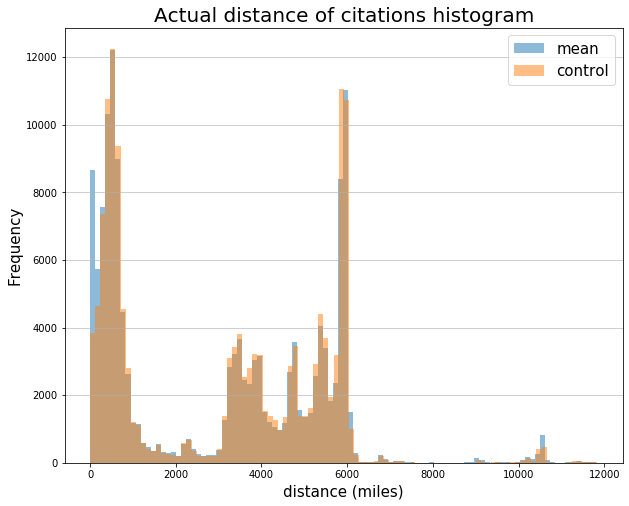

In [65]:
#We want to plot a histogram of the actual distance to understand it
#The first thing to do therefore is to seperate actual citation from the controls
#this is done using the Actual_citation_first column where 1 means there is a citation, 0 means there isn't
data_cited = data[data["Actual_citation_first"] == 1]
data_ncited = data[data["Actual_citation_first"] == 0]

#These seperated datasets can then be used to plot a histogram to show distance
plt.figure(figsize=[10,8])
plt.hist(x=data_cited["distance_mean"], bins  = 100, alpha = 0.5, label = "mean")
#plt.hist(x=data_cited["distance_min"], bins = 100, alpha = 0.5, label = "min")
plt.hist(x=data_ncited["distance_mean"], bins  = 100, alpha = 0.5, label = "control")
#plt.hist(x=data_ncited["distance_min"], bins = 100, alpha = 0.5, label = "not_min")
plt.legend(loc = "upper right", fontsize = 15)
plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("distance (miles)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Actual distance of citations histogram", fontsize = 20)
#plt.xlim(left = 0, right = 1000)

#what can be seen here is that there are peaks in between 0-1000, 3000-4000, 5000-6000 miles, representing patents from 
#the UK and Europe, United States, and China, Japan and South Korea

The second graphic we want is to show a histogram of lag citations and how they vary

(0, 43.05)

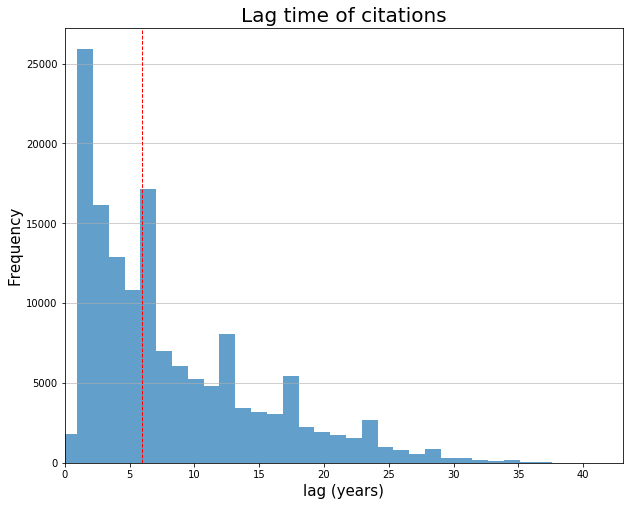

In [66]:
#this figure looks at the lag time of citations
#so the time between the cited and the citing patent
#50% of citations come within 6 years and it tapes off after that

plt.figure(figsize = [10,8])
plt.hist(x = data_cited["lag"], alpha =0.7, bins = 50)
#https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
plt.axvline(data_cited["lag"].median(), color='red', linestyle='dashed', linewidth=1)

plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("lag (years)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Lag time of citations", fontsize =  20)
plt.xlim(left=0)

The third graphic explores the difference in patents that originate within given priority years. This is used to explain why these years were chosen to explore how distance has changed over time.

(1976, 2013.75)

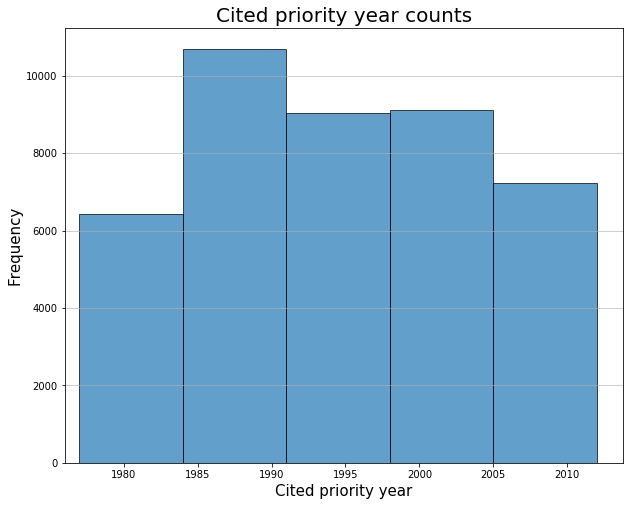

In [67]:
#this looks at the distributed of the cited patents in terms of their years
#this break seems like a good one of every 7 years
#this could mean that we can explore the effects of distance for every 7 years
#see if distance has increased or not

data_cited_ind = data_cited.groupby(["Cited_App_nbr_first"]).agg({"Cited_prio_year":"first", "cited_count":"first"})
data_cited_ind

plt.figure(figsize = [10,8])
plt.hist(x = data_cited_ind["Cited_prio_year"], alpha =0.7, bins = [1977,1984,1991,1998,2005,2012], edgecolor = "black")
plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("Cited priority year", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Cited priority year counts", fontsize =  20)
plt.xlim(left=1976)

The next graphic is used for citation counts for patents to explore their distribution. This is to use to inform the woork about patent value. A patent that has a higher number of citations is assumed to have a higher value.

(0, 100)

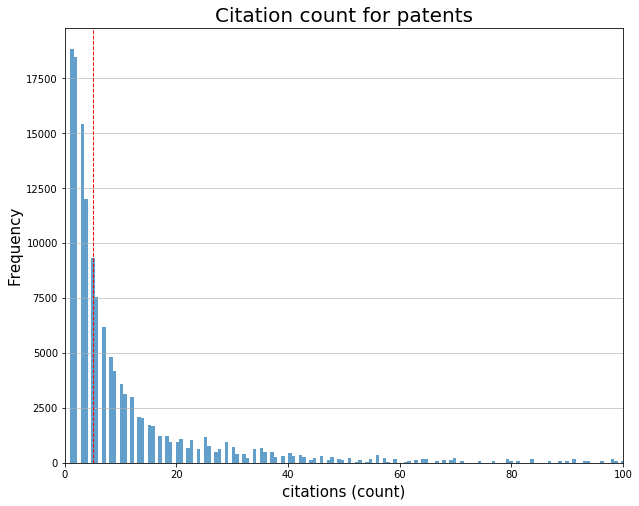

In [68]:
#this plot looks at the citation count for patents
#most patents only have one citation
#but the median is 5 citations for each patent
#a patent that is in the top 25% has 14 citations
#this would be good to explain the value of patents


plt.figure(figsize = [10,8])
plt.hist(x = data_cited["cited_count"], alpha =0.7, bins = 1000)
plt.axvline(data_cited["cited_count"].median(), color='red', linestyle='dashed', linewidth=1)
#plt.text(data_cited["cited_count"].median()*1.1, 'Mean: {:.2f}'.format(data_cited["cited_count"].median()))
plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("citations (count)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Citation count for patents", fontsize = 20)
plt.xlim(left=0, right = 100)

Raw data is then obtained in terms of distance for both the EPO, PCT and combined datasets in terms of percantage of actual citated that are within the administrative and distance boundaries

In [69]:
#data is firstly seperated into EPO and PCT data based on the data_cited dataframe created above
data_cited_EPO = data_cited.loc[data_cited["Cited_App_nbr_first"].str.contains("EP"), :]
data_cited_WO = data_cited.loc[data_cited["Cited_App_nbr_first"].str.contains("WO"), :]

In [70]:
data_cited_WO.count()

Actual_citation_first    77207
Cited_App_nbr_first      77207
Cited_prio_year          77207
Citing_app_nbr_first     77207
IPC                      77207
IPC_6_match              77207
cited_count              77207
country_match_first      77207
distance_mean            77207
distance_min             77207
index                    77207
lag                      77207
local_match_first        77207
region_match_first       77207
ln(distance+1)           77207
miles0-25                77207
miles25-50               77207
miles50-100              77207
miles100-250             77207
miles250-500             77207
miles500-1000            77207
miles1000-2500           77207
miles2500-5000           77207
miles>5000               77207
dtype: int64

In [71]:
#mean values are then calcualed for all of the statistics for the PCT, EPO and combined dataset
print(data_cited_WO["local_match_first"].mean())
print(data_cited_WO["region_match_first"].mean())
print(data_cited_WO["country_match_first"].mean())
print(data_cited_WO["miles0-25"].mean())
print(data_cited_WO["miles25-50"].mean())
print(data_cited_WO["miles50-100"].mean())
print(data_cited_WO["miles100-250"].mean())
print(data_cited_WO["miles250-500"].mean())
print(data_cited_WO["miles500-1000"].mean())
print(data_cited_WO["miles1000-2500"].mean())
print(data_cited_WO["miles2500-5000"].mean())
print(data_cited_WO["miles>5000"].mean())
print(data_cited_WO["distance_mean"].mean())
print(data_cited_WO["distance_mean"].median())
print(data_cited_WO["distance_min"].mean())
print(data_cited_WO["distance_min"].median())

0.0015801676013832942
0.01016747186135972
0.050630124211535225
0.0018133070835546
0.00462393306306423
0.010491276697708756
0.035411296903130544
0.10457600994728457
0.15727848511145362
0.05301332780706412
0.29205901019337627
0.3407333531933633
3438.5526620590376
3859.4053181567456
3319.3236281445243
3696.9160533794093


In [72]:
print(data_cited_EPO["local_match_first"].mean())
print(data_cited_EPO["region_match_first"].mean())
print(data_cited_EPO["country_match_first"].mean())
print(data_cited_EPO["miles0-25"].mean())
print(data_cited_EPO["miles25-50"].mean())
print(data_cited_EPO["miles50-100"].mean())
print(data_cited_EPO["miles100-250"].mean())
print(data_cited_EPO["miles250-500"].mean())
print(data_cited_EPO["miles500-1000"].mean())
print(data_cited_EPO["miles1000-2500"].mean())
print(data_cited_EPO["miles2500-5000"].mean())
print(data_cited_EPO["miles>5000"].mean())
print(data_cited_EPO["distance_mean"].mean())
print(data_cited_EPO["distance_mean"].median())
print(data_cited_EPO["distance_min"].mean())
print(data_cited_EPO["distance_min"].median())

0.05872036945020898
0.08508461695846609
0.15559874901353288
0.04996638704585976
0.019480899073451612
0.026057346622628826
0.06842428316721715
0.17355975798673018
0.202028468710724
0.03574664601174992
0.21502060620232075
0.2097156051793178
2341.030029922337
746.4699493640567
2234.71017611431
657.1307071473846


In [73]:
print(data_cited["distance_mean"].mean())
print(data_cited["distance_mean"].median())
print(data_cited["distance_min"].mean())
print(data_cited["distance_min"].median())

2922.8791290920403
3293.198869214289
2809.7155031411667
3215.9544631156164


These next graphics are used to show the distance decay as against the reference conditions of 0-25 miles according to the results from each of the datasets.

The first is based on the results from the different years

In [103]:
years = pd.DataFrame({"distance": ["0-25 (reference)","25-50", "50-100", "100-250", "250-500", "500-1000", "1000-2500",
                                  "2500-5000", "5000+"],
                    "group 1": [0, -11.5, -9.4,-10.0,-13.0, -14.6, -15.1,-16.1,-15.1],
                     "group 2": [0, 0, -5.0, 0, -6.6, -7.4, -5.1,-8.0,-9.0],
                     "group 3": [0, -11.7,-12.6,-10.4,-12.4, -12.9,-11.2,-11.8,-13.3],
                     "group 4": [0, -9.7,-15.4,-14.1,-15.7,-15.4,-11.7, -15.3, -16.1],
                     "group 5": [0, -15.6, -20.7, -13.8, -16.3, -14.4, -15.4, -14.2, -14.8],
                     "group 6": [0, -6.1,-6.1,-6.5,-9.5,-10.5,-8.8,-11.0, -11.4],
                     "group 7": [0, -12.9, -17.6, -13.5, -15.1, -14.7, -12.7, -14.3, -15.2]})

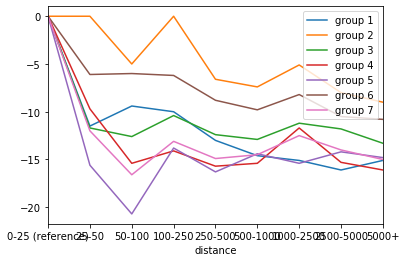

In [75]:
years.plot.line(x="distance")

Text(0, 0.5, 'Percentage points decrease')

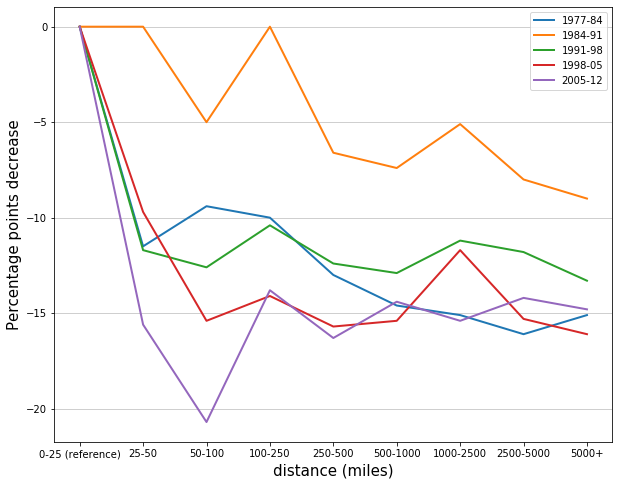

In [76]:
#This shows the results when the years are split according to the 5 year gaps

plt.figure(figsize = [10,8])
plt.plot("distance","group 1", data=years, linewidth = 2, label = "1977-84" )
plt.plot("distance","group 2", data=years, linewidth = 2, label = "1984-91" )
plt.plot("distance","group 3", data=years, linewidth = 2, label = "1991-98" )
plt.plot("distance","group 4", data=years, linewidth = 2, label = "1998-05" )
plt.plot("distance","group 5", data=years, linewidth = 2, label = "2005-12" )
plt.legend()
plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("distance (miles)", fontsize = 15)
plt.ylabel("Percentage points decrease", fontsize = 15)
#plt.title("Citation count for patents", fontsize = 20)

Text(0, 0.5, 'Percentage points decrease')

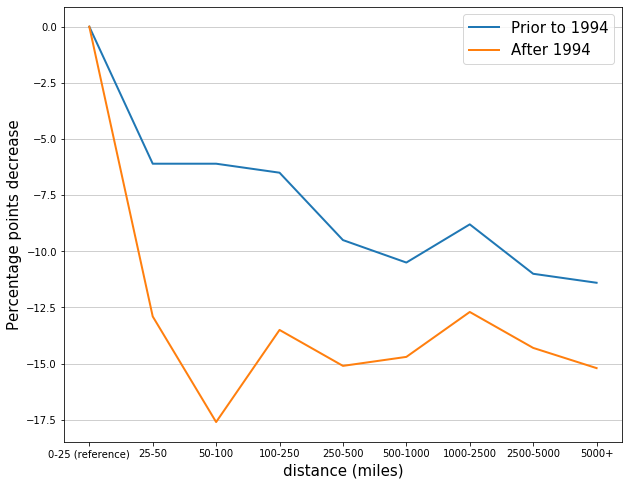

In [105]:
#This shows the main difference between those prior to 1994 and those after 1994

plt.figure(figsize = [10,8])
plt.plot("distance","group 6", data=years, linewidth = 2, label = "Prior to 1994" )
plt.plot("distance","group 7", data=years, linewidth = 2, label = "After 1994" )
plt.legend(fontsize = 15)
plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("distance (miles)", fontsize = 15)
plt.ylabel("Percentage points decrease", fontsize = 15)
#plt.title("Citation count for patents", fontsize = 20)

Text(0, 0.5, 'Percentage points decrease')

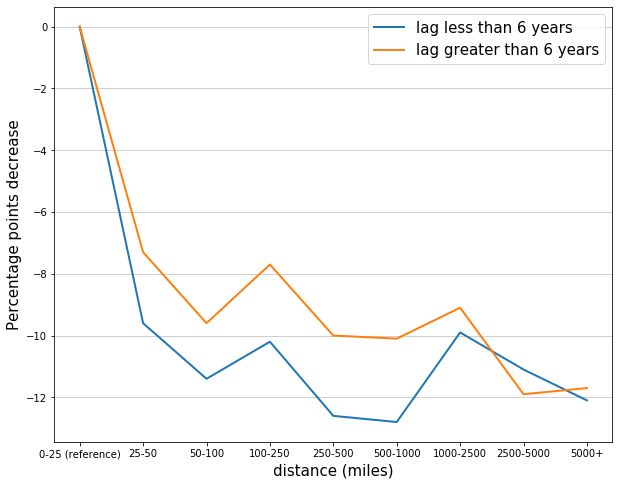

In [78]:
#this shows the results relating to those with a lag of less than 6 years and those with a lag greater than 6 years

lag = pd.DataFrame({"distance": ["0-25 (reference)","25-50", "50-100", "100-250", "250-500", "500-1000", "1000-2500",
                                  "2500-5000", "5000+"],
                    "group 1": [0, -9.6, -11.4,-10.2,-12.6, -12.8,-9.9, -11.1,-12.1],
                     "group 2": [0, -7.3,-9.6,-7.7,-10.0,-10.1,-9.1,-11.9,-11.7]})


plt.figure(figsize = [10,8])
plt.plot("distance","group 1", data=lag, linewidth = 2, label = "lag less than 6 years" )
plt.plot("distance","group 2", data=lag, linewidth = 2, label = "lag greater than 6 years" )
plt.legend(fontsize = 15)
plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("distance (miles)", fontsize = 15)
plt.ylabel("Percentage points decrease", fontsize = 15)
#plt.title("Citation count for patents", fontsize = 20)

Text(0, 0.5, 'Percentage points decrease')

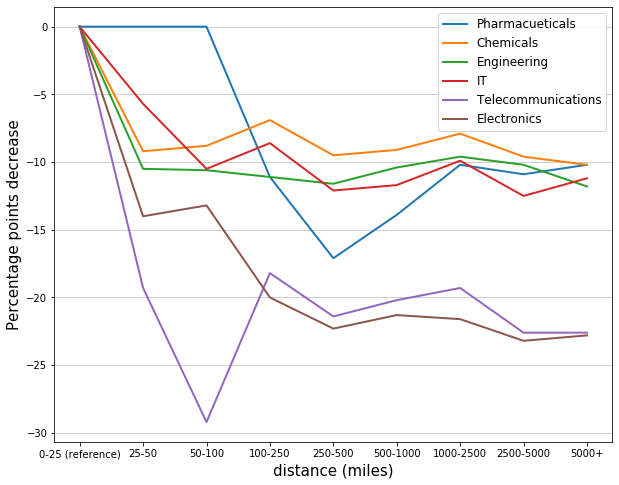

In [79]:
#This shows the results across the different industries

industries = pd.DataFrame({"distance": ["0-25 (reference)","25-50", "50-100", "100-250", "250-500", "500-1000", "1000-2500",
                                  "2500-5000", "5000+"],
                    "Pharmaceuticals": [0, 0, 0,-11.1,-17.1, -13.9,-10.2, -10.9,-10.2],
                     "Chemicals": [0, -9.2,-8.8,-6.9,-9.5,-9.1,-7.9,-9.6,-10.2],
                    "Engineering": [0, -10.5, -10.6,-11.1,-11.6, -10.4, -9.6,-10.2,-11.8],
                     "IT": [0, -5.7, -10.5, -8.6, -12.1, -11.7, -9.9,-12.5,-11.2],
                     "Telecommunications": [0, -19.3,-29.2,-18.2,-21.4, -20.2,-19.3,-22.6,-22.6],
                     "Electronics": [0, -14,-13.2,-20.0,-22.3,-21.3,-21.6, -23.2, -22.8]})


plt.figure(figsize = [10,8])
plt.plot("distance","Pharmaceuticals", data=industries, linewidth = 2, label = "Pharmacueticals" )
plt.plot("distance","Chemicals", data=industries, linewidth = 2, label = "Chemicals" )
plt.plot("distance","Engineering", data=industries, linewidth = 2, label = "Engineering" )
plt.plot("distance","IT", data=industries, linewidth = 2, label = "IT" )
plt.plot("distance","Telecommunications", data=industries, linewidth = 2, label = "Telecommunications" )
plt.plot("distance","Electronics", data=industries, linewidth = 2, label = "Electronics" )
plt.legend(fontsize = 12)
plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("distance (miles)", fontsize = 15)
plt.ylabel("Percentage points decrease", fontsize = 15)
#plt.title("Citation count for patents", fontsize = 20)

# To look at regional distribution

This section links the results to the regions, and then exports the regional inventor share to be tranformed into relevant graphics in R.

In [80]:
#read in the patents that have all the inventor team in GB
EPO_GB = pd.read_csv("Patents data/EPO_citations_GB.csv")
PCT_GB = pd.read_csv("Patents data/PCT_citations_GB.csv")

In [81]:
EPO_GB

,Unnamed: 0,Citing_pub_nbr,Citing_pub_date,Citing_app_nbr,Citing_appln_id,Cited_pub_nbr,Cited_pub_date,Cited_App_auth,Cited_App_nbr,Cited_Appln_id,Cit_Total,Citn_origin,Citn_category,Citn_lag_year,Citn_lag_month,PCT_Route
0,9371,EP0002210,1979/06/13,EP19780101388,16428374,EP0000636,1979/02/07,EP,EP19780300148,16429355.0,3,SEA,E,0.0,4.0,0
1,16716,EP0003890,1979/09/05,EP19790300234,16436949,EP0001473,1979/04/18,EP,EP19780300203,16429410.0,5,SEA,NaN,0.0,5.0,0
2,16729,EP0003892,1979/09/05,EP19790300237,16436952,EP0000636,1979/02/07,EP,EP19780300148,16429355.0,2,SEA,NaN,0.0,7.0,0
3,19047,EP0004414,1979/10/03,EP19790300251,16436966,EP0001473,1979/04/18,EP,EP19780300203,16429410.0,6,EXA,NaN,0.0,6.0,0
4,23331,EP0005362,1979/11/14,EP19790300749,16437453,EP0000099,1978/12/20,EP,EP19780300030,16429240.0,5,SEA,NaN,1.0,11.0,0
5,23833,EP0005476,1979/11/28,EP19790101299,16431989,EP0000520,1979/02/07,EP,EP19780100395,16427449.0,4,SEA,NaN,0.0,9.0,0
6,24063,EP0005534,1979/11/28,EP19790101477,16432150,EP0002595,1979/06/27,EP,EP19780300781,16429972.0,11,SEA,NaN,0.0,5.0,0
7,24650,EP0005658,1979/11/28,EP19790400268,16439987,EP0000559,1979/02/07,EP,EP19780100463,16427512.0,5,SEA,NaN,0.0,9.0,0
8,27623,EP0006268,1980/01/09,EP19790200295,16436231,EP0001853,1979/05/16,EP,EP19780200259,16429082.0,3,SEA,NaN,1.0,8.0,0
9,27688,EP0006281,1980/01/09,EP19790300565,16437273,EP0000280,1979/01/10,EP,EP19780300093,16429300.0,8,SEA,NaN,1.0,12.0,0


In [82]:
#we want to group by either the cited app nbr or the citing app nbr
#this is so we can identify the origins of the individuals who are involved in the patents 
EPO_GB_cited = EPO_GB.groupby(["Cited_App_nbr"]).agg({"Cit_Total":"first"})
PCT_GB_cited = PCT_GB.groupby(["Cited_App_nbr"]).agg({"Cit_Total":"first"})
EPO_GB_citing = EPO_GB.groupby(["Citing_app_nbr"]).agg({"Cit_Total":"first"})
PCT_GB_citing = PCT_GB.groupby(["Citing_app_nbr"]).agg({"Cit_Total":"first"})

In [83]:
#make sure to reset the index on all results
EPO_GB_cited.reset_index(inplace= True)
PCT_GB_cited.reset_index(inplace= True)
EPO_GB_citing.reset_index(inplace=True)
PCT_GB_citing.reset_index(inplace=True)

In [84]:
#read in the individual data
EPO_ind = pd.read_csv("Patents data/202001_EPO_Inv_reg.txt", sep = "|", header =0)
PCT_ind = pd.read_csv("Patents data/202001_PCT_Inv_reg.txt", sep = "|", header = 0)

In [85]:
#merge the cited and citing data
EPO_GB_cited = EPO_GB_cited.merge(EPO_ind, left_on = "Cited_App_nbr", right_on = "app_nbr")
PCT_GB_cited = PCT_GB_cited.merge(PCT_ind, left_on = "Cited_App_nbr", right_on = "pct_nbr")
EPO_GB_citing = EPO_GB_citing.merge(EPO_ind, left_on = "Citing_app_nbr", right_on = "app_nbr")
PCT_GB_Citing = PCT_GB_citing.merge(PCT_ind, left_on = "Citing_app_nbr", right_on = "pct_nbr")

In [86]:
#limit the PCT_cited to only those that have a country code with GB (for some reason it picked up those that are not wholly
#in the UK)
PCT_GB_cited = PCT_GB_cited[PCT_GB_cited["ctry_code"] ==  "GB"]

In [87]:
#groupby the region code for the cited 
#we will use the inventor share sum to see how inventive regions are
EPO_GB_cited_reg = EPO_GB_cited.groupby(["reg_code"]).agg({"inv_share":"sum"})
PCT_GB_cited_reg = PCT_GB_cited.groupby(["reg_code"]).agg({"inv_share":"sum"})
EPO_GB_cited_reg.reset_index(inplace = True)
PCT_GB_cited_reg.reset_index(inplace = True)

In [88]:
#the same is done for the citing patents
EPO_GB_citing_reg = EPO_GB_citing.groupby(["reg_code"]).agg({"inv_share":"sum", "ctry_code":"first"})
PCT_GB_Citing_reg = PCT_GB_Citing.groupby(["reg_code"]).agg({"inv_share":"sum", "ctry_code":"first"})
EPO_GB_citing_reg.reset_index(inplace = True)
PCT_GB_Citing_reg.reset_index(inplace = True)

In [89]:
#we want the EPO and teh PCT data in the same dataframe
cited_regions = EPO_GB_cited_reg.merge(PCT_GB_cited_reg, on = "reg_code", how = "outer")
citing_region = EPO_GB_citing_reg.merge(PCT_GB_Citing_reg, on = "reg_code", how = "outer")

In [90]:
#fill any na values with 0
cited_regions.fillna(0, inplace = True)
citing_region.fillna(0, inplace = True)

In [91]:
#for the citing region there are some issues with the US and isreal which are sorted here
citing_region["inv_share"] = citing_region["inv_share_x"] + citing_region["inv_share_y"]
citing_region.drop(["inv_share_x", "inv_share_y"], axis = 1, inplace = True)
citing_region["reg_code"] = citing_region["reg_code"].str[-5:].where(citing_region["ctry_code_x"].eq('US'),citing_region["reg_code"]) 
citing_region["reg_code"] = citing_region["reg_code"].str[-5:].where(citing_region["ctry_code_y"].eq('US'),citing_region["reg_code"])
citing_region["reg_code"] = citing_region["reg_code"].str[0:4].where(citing_region["ctry_code_x"].eq('IL'),citing_region["reg_code"])
citing_region["reg_code"] = citing_region["reg_code"].str[0:4].where(citing_region["ctry_code_y"].eq('IL'),citing_region["reg_code"])

In [92]:
#get the cited region inv_share
cited_regions["inv_share"] = cited_regions["inv_share_x"] + cited_regions["inv_share_y"]
cited_regions.drop(["inv_share_x", "inv_share_y"], axis = 1, inplace = True)

In [93]:
#check the result
cited_regions

,reg_code,inv_share
0,CH011,0.500000
1,GBZZZ,1628.106061
2,GY000,19.000000
3,IM000,40.250000
4,JE000,12.000000
5,UKC11,163.733333
6,UKC12,98.600000
7,UKC13,75.100000
8,UKC14,291.782576
9,UKC21,157.316667


In [94]:
#drop any unecessary columns
citing_region.drop(["ctry_code_x", "ctry_code_y"], axis = 1, inplace = True)

In [95]:
#output the results to seperate csvs
cited_regions.to_csv("Patents data/cited_regions_count.csv", index = False)
citing_region.to_csv("Patents data/citing_regions_count.csv", index = False)

### All patents that originate in the UK

In [96]:
#we now want all patents that originate in the UK

EPO_ind_GB = EPO_ind.loc[EPO_ind["ctry_code"] == "GB", :]
PCT_ind_GB = PCT_ind.loc[PCT_ind["ctry_code"] == "GB", :]
EPO_ind_GB_grouped = pd.DataFrame(EPO_ind_GB.groupby("app_nbr")["inv_share"].sum())
PCT_ind_GB_grouped = pd.DataFrame(PCT_ind_GB.groupby("pct_nbr")["inv_share"].sum())
EPO_ind_GB_grouped.reset_index(inplace= True)
PCT_ind_GB_grouped.reset_index(inplace = True)
EPO_ind_GB_grouped_all = EPO_ind_GB_grouped[EPO_ind_GB_grouped["inv_share"] == 1]
PCT_ind_GB_grouped_all = PCT_ind_GB_grouped[PCT_ind_GB_grouped["inv_share"] == 1]
EPO_ind_GB_grouped_all_list = list(EPO_ind_GB_grouped_all["app_nbr"].unique())
PCT_ind_GB_grouped_all_list = list(PCT_ind_GB_grouped_all["pct_nbr"].unique())

In [97]:
#get only those results that have all their inventor team in the UK
EPO_ind_GB_only = EPO_ind[EPO_ind["app_nbr"].isin(EPO_ind_GB_grouped_all_list)] 
PCT_ind_GB_only = PCT_ind[PCT_ind["pct_nbr"].isin(PCT_ind_GB_grouped_all_list)] 

In [98]:
#get out how many patents that is
total_patents = len(list(EPO_ind_GB_only["app_nbr"].unique())) + len(list(PCT_ind_GB_only["pct_nbr"].unique()))

In [99]:
#get the region code sum for inventor shares
EPO_GB_tot_reg = EPO_ind_GB_only.groupby(["reg_code"]).agg({"inv_share":"sum"})
PCT_GB_tot_reg = PCT_ind_GB_only.groupby(["reg_code"]).agg({"inv_share":"sum"})

In [100]:
#reset the index and merge the EPO and PCT results
EPO_GB_tot_reg.reset_index(inplace = True)
PCT_GB_tot_reg.reset_index(inplace = True)
total_merged = EPO_GB_tot_reg.merge(PCT_GB_tot_reg, on = "reg_code", how = "outer")

In [101]:
#drop any unecessary columns and create a column of the total inv_share
#total_merged.drop(["index_x", "index_y"], axis = 1, inplace = True)
total_merged.fillna(0, inplace = True)
total_merged["inv_share"] = total_merged["inv_share_x"] + total_merged["inv_share_y"]
total_merged.drop(["inv_share_x", "inv_share_y"], axis = 1, inplace = True)

In [102]:
#output the result to the all_UK_patents_Region.csv to be used in R
total_merged.to_csv("Patents data/all_UK_patents_region.csv", index = False)